### Présentation OpenStreetMap
  
  
  
<img src="illustration_OSM/Openstreetmap_logo.svg"/> 
  
  
  
  


<div style="text-align:right">M. VIRY<br>UMS RIATE<br><br><b><i>11/02/2016</b></i></div>

## 1 / Le projet


#### Les débuts 

Le projet a été initié en 2004 par Steve Coast au Royaume-Uni (*University college of London*), notamment encouragé par le manque de données accessibles ou réutilisables. 
C'est un projet communautaire et sans but lucratif qui vise à permettre la diffusion de données géographiques sous licence libre et il s'inscrit à ce titre dans le courant du libre et dans celui du web 2.0.

En 2006 la fondation OpenStreetMap est établie pour supporter le developpement du projet et encourager la diffusion des données.

Dès 2006 le projet obtient le soutien de plusieurs organismes [1] tels que *Yahoo!* (qui autorise l'utilisation de ses images aériennes dès décembre 2006), le Bureau du recensement américain (*U.S. Census Bureau*, via l'intégration de sa *BD TIGER* dès 2007) ou l'État français (qui autorise l'utilisation de son cadastre digitalisé).

En France, le développement est soutenu par l'[association OpenStreetMap française](http://openstreetmap.fr/asso) qui a vue le jour en 2011. Elle participe notamment activement à la coordination du projet Base Adresse Nationalle ouverte (*projet BANO*) en collaboration avec *la Poste*, l'*IGN* et *Etalab*.

[1]: Une liste à jour des contributeurs institutionnels existe sur le 
[Wiki du projet](http://wiki.openstreetmap.org/wiki/Contributors)

## 1 / Le projet

#### La carte

Le projet est principalement connue pour son site web permettant de visualiser les données "à la Google Map" :
[www.openstreetmap.org](www.openstreetmap.org)

<img src="illustration_OSM/OSM_mainpage.png" width="85%" height="85%"/>

De nombreuses utilisations de la base de données sont possibles et ne se limittent pas à la **représentation cartographique** : 
- **géocodage**,
- **routing**,
- **extraction de données thématiques**,
- **fouilles diverses parmis les statistiques engendrées par le projet**,
- etc...

## 2 / Les données et leur structure


#### A) Structure

Les données sont composées de 3 types d'éléments primitifs :

- **node** (un noeud) : c'est l'éléments primitifs de base; il dispose d'un identifiant interne, de coordonnées (au format WGS84, c-a-d latitude - longitude), de méta-données (date de modification, nom de l'auteur, etc.) et éventuellement des tags.
<img src="illustration_OSM/node.svg" width="7%" height="7%" align="right"/>

- **way** (un chemin) : c'est un élément qui est décrit par minimum deux noeuds ainsi qu'un identifiant, des méta-données et des éventuels tags. C'est élément qui est utilisé pour représenter les routes et voies ferrées par exemple. Attention toutefois, cet élément ne décrit pas seulement des lignes mais aussi parfois des surfaces lorsque la ligne est fermé *et* est associée à un tag spécifique (tel que *area=yes*, *boundary=administrative*, etc.).
(pour la différenciation ligne fermée/polygone on pourra se réferrer à [la page du Wiki consacrée au sujet](http://wiki.openstreetmap.org/wiki/Area) ainsi qu'aux [règles appliquées par certaines applications](http://wiki.openstreetmap.org/wiki/Overpass_turbo/Polygon_Features).
<img src="illustration_OSM/way.svg" width="7%" height="8%" align="right"/>
<img src="illustration_OSM/area.svg" width="7%" height="8%" align="right"/>

- **relation** (une relation) : c'est un élément qui décrit une relation complexe entre d'autres objets (pouvant être des 3 types: *node*, *way* ou *relation*). Il pourra par exemple s'agir de l'aggrégation d'objets hétéroclites appartenant à un même site (un aéroport pourra être décrit comme une relation, contenant l'ensemble des objets référencés lui appartenant : piste d'atterrissage, salle d'embarquement, etc.). Les relations contiennent donc des références à leurs membres, appartenant aux trois catégories citées ainsi que le rôle de chacun d'eux (*inner*, *outer*, *admin_centre*, *member* notamment). Ces relations désignent parfois simplement un groupe de polygones (groupe de bâtiments par exemple) et le type est alors explicité via le tag *type=multipolygon*.
<img src="illustration_OSM/relation.svg" width="7%" height="7%" align="right"/>

## 2 / Les données et leur structure

#### B) Stockage et mise à disposition

Les données sont stockées sur des serveurs appartenant à la fondation (dans une base de données *PostgreSQL* répliquée sur plusieurs serveurs).
Les données sont mises à disposition par plusieurs biais:
 - une image hedbomadaire de l'intégralité de la base est mise à disposition par la fondation,
 - des *changelog* sont produits chaque minute pour permettre aux différents utilisateurs de maintenir leurs bases à jour,
 - des extraits de la base à l'échelle de métropoles [1] et à l'échelle de pays [2] sont mis à disposition quotidiennnement par des entreprises participant au projet,
 - des API permettent d'effectuer des requêtes ciblées (type d'éléments / tags / localisation / etc.) pour obtenir les données (à jour).
 
 
 [1] https://mapzen.com/data/metro-extracts/  
 [2] http://download.geofabrik.de/

## 2 / Les données et leur structure

#### C) Le format des données

Les données sont originellement disponible au format XML. Il est d'usage que les types d'éléments soient ordonnés dans l'ordre vu précédement (node, way, relation) mais ce n'est pas toujours le cas des réponses de l'API Overpass.

Ces éléments primitifs se déclarent de la manière suivante :   

**Node : **
```xml
<node id="3845324676" lat="51.2010251" lon="3.2713123" version="2" timestamp="2015-11-19T19:34:36Z" changeset="35444712" uid="3051443" user="JaWaNiJo">
    <tag k="amenity" v="recycling"/>
    <tag k="recycling:glass_bottles" v="yes"/>
```

**Way :**
```xml
    <way id="55342219" version="6" timestamp="2011-10-07T17:55:09Z" changeset="9496178" uid="497177" user="TripleBee">
        <nd ref="1457916380"/>
        <nd ref="695147042"/>
        <nd ref="695147043"/>
        <tag k="name" v="De Wandelaar"/>
        <tag k="lanes" v="2"/>
        <tag k="oneway" v="no"/>
        <tag k="highway" v="residential"/>
        <tag k="surface" v="asphalt"/>
        <tag k="maxspeed" v="50"/>
    </way>
```  

**Relation :**
```xml
    <relation id="5758806" version="1" timestamp="2015-12-21T03:38:54Z" changeset="36077183" uid="672253" user="JanFi">
        <member type="way" ref="386889612" role="outer"/>
        <member type="way" ref="328207785" role="inner"/>
        <member type="way" ref="363907996" role="inner"/>
        <member type="way" ref="366939772" role="inner"/>
        <member type="way" ref="366939778" role="inner"/>
        <tag k="type" v="multipolygon"/>
        <tag k="landuse" v="meadow"/>
    </relation>
```

S'il est compréhensible, ce format de données s'avère toutefois **particulièrement volumineux** (l'ensemble de la base OSM représente environ 620Go sous cette forme). Une alternative consiste en l'utilisation d'un format binaire et compressé (le *Protocol Buffers*), contenant les mêmes informations, et portant l'extension *.osm.pbf*.

Quelle que soit la solution choisie, la création d'objets (au sens SIG) à partir de ce type de données va nécessiter de résoudre les différentes relations existantes [ *way* __->__ *nodes* puis *relation* __->__ *(node|way|relation)*]. 

Des compétences rudimentaires dans n'importe quel language de script/programmation permettront facilement de créer un fichier type shapefile à partir de ces extraits XML (un exemple est fourni en python dans les annexes); la démarche est simple :
- **Créer une table de l'ensemble des points (nodes)**,
- **Reconstituer les différents chemins (ways)** grâce à ces points et définir si le chemin représente une ligne ou une surface,
- **Reconstituer les différentes relations grâce au points, chemins et relations précédemment extraits** (et définir si ces relations peuvent convenir à un format SIG ou s'il s'agit de collections de géométries).

Une fois saisi l'aspect relationel des données et le procédé récursif nécessaire à leur extraction on comprend le temps nécessaire à l'extraction des éléments présents dans un fichier volumineux.

## 3 / La récupération des données 

### A) Données brutes - Fichier complet / extrait :

Plusieurs sources [1] existent pour se procurer une copie ou extrait de la base de données. Les plus utilisées, selon l'échelle souhaitée sont:
 - Ensemble de la base: un des serveurs répliquant la base de données (http://ftp5.gwdg.de/pub/misc/openstreetmap/planet.openstreetmap.org/ la réplique quotidiennement et est le plus performant)
 - Extrait continental/national: http://download.geofabrik.de/ (MAJ quotidienne)
 - Extrait d'emprise métropolitaine: https://mapzen.com/data/metro-extracts/ (MAJ hebdomadaire)
 - Extrait d'emprise personnalisée: http://www.overpass-api.de/ (MAJ continue)

[1] [Liste officielle sur le Wiki](wiki.openstreetmap.org/wiki/Planet.osm)

## 3 / La récupération des données 

### B) Données transformées :

Plusieurs sites web proposent également des extraits thématiques (notamment disponibles dans des formats plus adaptés au SIG). Si ces extraits s'avèrent utiles et pratiques; ils sont le résultats de choix effectuées en terme de sélections des tags/objets et peuvent ne pas correspondre au besoin voulu.
Les plus pratiques :

 - http://download.geofabrik.de/ propose des extraits au formats Shapefile (mêmes emprises et même fréquence de *maj* que pour les données brutes); ces extraits sont composés de 8 couches : *buildings*, *landuse*, *natural*, *places*, *points*, *railways*, *roads*, *waterways*.  
   
   
 - https://mapzen.com/data/metro-extracts/ propose les mêmes extraits au format geojson et au format shapefile selon deux modes d'extractions (l'un s'attachant au type de géométrie et l'autre s'attachant aux tags utilisés).  
   
   
 - http://download.bbbike.org/osm/ propose des extraits d'emprise variés (environ 200 zones) disponibles dans des formats variés (shapefile, svg, png, etc..)

## 3 / La récupération des données 

### C) Requête à l'une des API du projet (API officielle, XAPI, ...) :

Plusieurs API permettent d'effectuer des requêtes sur la base de données. Le choix de l'une d'entre-elle dépendra des besoins rencontrés :
- l'API officielle (actuellement dans sa version en v0.6) est le mécanisme sous-jacent lors des opérations d'éditions effectuées par les contributeurs (via des interfaces graphiques comme *jOSM*), elle permet des actions de lecture, modification et création, objets par objets.
- un des API étendues (XAPI - eXtended API) :
    - l'API overpass est la plus pratique lorsque l'on souhaite faire une requête combinant différents type de paramètres; cette API permet en effet d'écrire des requêtes au format XML (en suivant la structure utilisée par les fichiers OSM) ou dans un language moins verbeux, dénommé *Overpass QL*; un outil developpé en parallèle (l'overpass Turbo) offre une interface pratique pour tester nos requêtes.
    - la jXAPI, Xappi.js, etc.. (RIP)

Interface de l'application web **_overpass turbo_** : 
<img src="illustration_OSM/overpass_illustration.png" width="85%" height="85%"/>

Testons quelques requêtes simples sur cette plateforme :  

http://overpass-turbo.eu
    
Il est également possible de partager ses requêtes :

>> http://overpass-turbo.eu/s/ekW (ici une requête de POI dans une zone délimitée)


>> http://overpass-turbo.eu/s/ekT (et une requête plus complexe montrant les possibilités de l'API overpass)


## 4 / L'extraction de données

#### - en vue de conserver le schéma original de la base :

 - **osm2pgsql** (-> vers PostgreSQL/PostGIS)
 - **osmium** (-> vers MySQL ou PostgreSQL/PostGIS)
 - **osmosis**
 - **spatialite_osm_raw** (-> vers SQLite/SpatiaLite)

Attention on note que l'extraction de l'ensemble des informations contenues dans un extrait peut nécessiter un espace de stockage important.  
*/!\ Exemple : la mise en base de données avec l'outil *spatialite_osm_raw* d'un extrait osm.pbf de 640Mo (soit environ la taille de l'Espagne et du Portugal) peut occuper environ 15Go.*

## 4 / L'extraction de données

#### - sans volonté de conserver le schéma d'origine (-> extraction thématique)

Différents outils s'offrent à nous pour réaliser des extractions thématiques. Tous réalisent (+/-) la même tâche mais de manière différente. Ainsi le choix d'un outil peut dépendre de plusieurs éléments : le volume des données à traiter, le type d'éléments souhaité et... votre implication dans cette entreprise.

- **`ogr2ogr`** [1]
- **`spatialite_osm_map`** [2]
- Bibliothèque **`osmium`** [3]
- À l'aide de QGIS (procédé reposant sur `ogr2ogr`) notamment avec les plug-ins *QuickOSM* ou *OSMDownloader*
- À l'aide de n'importe quel language qui vous permettrait 1/ de parser du XML   2/ de créer des entitées géographiques.

## 4 / L'extraction de données

#### - les autres outils utiles:

 - osmconvert (permet de convertir différents formats OSM : `.osm`, `.osm.pbf`, `.o5m`, etc.; il permet également de découper des fichier dans ces différents formats) [4]
 - osmfilter (permet de filter un fichier `.o5m` selon différents critères : tags, type d'objet, auteurs, timestamp, etc.) [4]
 - osmupdate (permet d'appliquer une *changefile* à un fichier OSM) [4]
 - imposm (permet différents types d'extraction, de la même manière qu'ogr2ogr ou osmium) [5]
 - osmosis (permet également différents types de manipulation des données OSM) [8]
 
 [1] http://www.gdal.org/ogr2ogr.html  
 [2] https://www.gaia-gis.it/fossil/spatialite-tools/index  
 [3] http://osmcode.org/  
 [4] http://wiki.openstreetmap.org/wiki/Osmconvert#Download  
 [5] http://wiki.openstreetmap.org/wiki/Osmfilter#Download  
 [6] http://wiki.openstreetmap.org/wiki/Osmupdate#Download  
 [7] http://imposm.org/  
 [8] http://wiki.openstreetmap.org/wiki/Osmosis  
 
 

## 4 / L'extraction de données

#### Exemple (1) : extraction des principales routes de l'extrait *Luxembourg* vers un fichier Shapefile

<u>Input</u> : 
 - extraits OSM du Luxembourg [1]  
 
<u>Outils</u> :
 - *ogr2ogr* pour l'extraction (résolution des relations, etc.) et la création de la base de données.  
 
<u>Output</u> :
 - Une couche au format Shapefile

**Etape 1:**  
Vérifier que le contenu du fichier `osmconf.ini` (dictionnaire de tags à exclure/préserver) correspond à nos besoins.

**Etape 2:**

```
$ ogr2ogr -f "ESRI Shapefile" highway_lux.shp -dialect SQLite \
 -sql "SELECT * FROM lines WHERE highway LIKE 'motorway%' OR \
 highway LIKE 'trunk%' OR highway LIKE 'primary%' OR highway LIKE 'secondary%' \
 OR highway LIKE 'tertiary%'" -gt 65536 --config OGR_SQLITE_SYNCHRONOUS OFF \
 --config OGR_SQLITE_CACHE 2048 --config OSM_MAX_TMPFILE_SIZE 2048 \
 -lco ENCODING=UTF-8 --config OSM_CONFIG_FILE "osmconf.ini-HIGHWAY" \
 --config OGR_INTERLEAVED_READING YES luxembourg-latest.osm.pbf
```

**Etape 3:**  
 - Visualisation du résultat dans QGIS:


<img src="illustration_OSM/qgis_extraction1.png"/>
  

[1] http://download.geofabrik.de/europe/luxembourg-latest.osm.pbf

## 4 / L'extraction de données

#### Exemple (2) : récupération de l'ensemble des passages piétons dans un rayon de 3km autour de nous

<u>Input</u> : 
 - Notre adresse

<u>Outils</u> :
 - Une connexion internet
 - Quelques compétences dans un langage de script (R, python, perl, bash, JS, etc..) pour automatiser la procédure

<u>Output</u> :
 - Une fichier Shapefile contenant la localisation (et les attributs) des passage piétons situés dans le coin.


**Etape 1:**
 - Récupération des coordonnées qui correspondent à notre adresse :

In [1]:
from geopy import Nominatim
Nominatim().geocode("8 place Paul-Ricoeur Paris").point

Point(48.8266967, 2.3824826, 0.0)

**Etape 2:**
 - Rédaction de la requête au format __`Overpass QL`__:

```json
[out:json];
(
  node["highway"~"crossing"](around:3000,48.8266967,2.3824826);
);
out body;>;out geom;
```

**Etape 3:**
 - Transformation de la requête en une URL et récupération du résultat (demandé ici au format 'json'):

```
wget -O result.json http://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%3B%28node%5B%22highway%22%7E%22crossing%22%5D%28around%3A3000%2C48%2E8266967%2C2%2E3824826%29%3B%29%3Bout%20body%3B%3E%3Bout%20body%20geom%3B%0A
```

**Etape 4:**
- Parsage des résultats et conversion vers un format adapté aux SIG:   
  
Chaque entitée est du type :
```json
{
  "type": "node",
  "id": 168363574,
  "lat": 48.8249827,
  "lon": 2.3572553,
  "tags": {
    "highway": "crossing"
  }
```
Et il est donc facile de transformer ces informations en une couche de points (en ligne de commande avec ogr2ogr, qu'avec les bindings gdal/ogr dans votre language de prédilection):

##### En python :

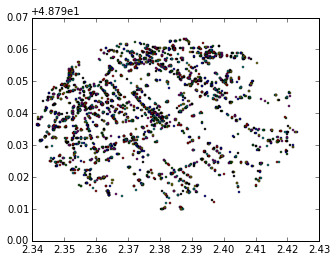

In [2]:
import geopandas, json
from shapely.geometry import Point
%matplotlib inline

with open('result.json', 'r') as f:
    data = json.loads(f.read())
gdf = geopandas.GeoDataFrame(data['elements'])
gdf.geometry = [Point(*i) for i in gdf[['lon', 'lat']].values]
gdf.tags = gdf.tags.apply(lambda x: str(x))
gdf.id = gdf.id.astype(int)
gdf.to_file('my_output.shp')
gdf.plot()

##### Ou avec R :

Warning message:
: package 'jsonlite' was built under R version 3.2.3Loading required package: sp
rgdal: version: 1.0-7, (SVN revision 559)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.2, released 2015/02/10
 Path to GDAL shared files: C:/Users/Matthieu/Documents/R/win-library/3.2/rgdal/gdal
 GDAL does not use iconv for recoding strings.
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: C:/Users/Matthieu/Documents/R/win-library/3.2/rgdal/proj
 Linking to sp version: 1.2-0 


ERROR: Error in writeOGR(output, "/Users/Matthieu/Desktop/output2.shp", "output", : Creation of output file failed


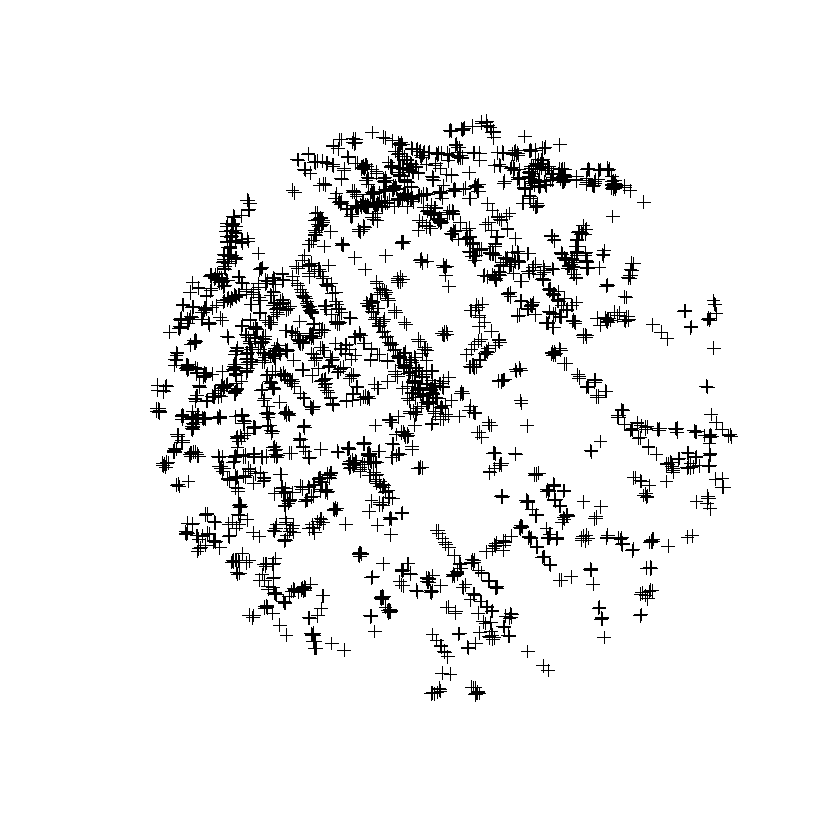

In [1]:
library(jsonlite)
library(rgdal)
library(sp)

data <- jsonlite::fromJSON(readLines('/Users/Matthieu/Desktop/ipython_wdir/result.json'))
data <- data.frame(data["elements"])
coords <- data[c("elements.lon","elements.lat")]
names(coords) <- c('lon','lat')
tags = data.frame(data$elements.tags[c("highway", "crossing", "source")])
output <- sp::SpatialPointsDataFrame(coords = coords,
                                     data = tags,
                                     proj4string = sp::CRS("+init=epsg:4326"))
writeOGR(output, '/Users/Matthieu/Desktop/output2.shp', 'output', 'ESRI Shapefile')
plot(output)

##### Ou dans un language destiné au web (JS, ...)
Des éléments récupérés de cette manière sont également très facilement utilisable en JS dans une page web (ou dans un environnement en Node.JS).

## 4 / L'extraction de données

#### Exemple  (3) : découpage puis extraction de relations complexes depuis une fichier volumineux

<u>Input</u> : 
 - Un extrait volumineux (par exemple de l'emprise de l'Europe)

<u>Outils</u> :
 - Une connexion internet
 - osmconvert / osmfilter / ogr2gr

<u>Output</u> :
 - Une base de données SQLite/SpatiaLite contenant les tables souhaitées

**Etape 1:**
 - Conversion du fichier :
 
```
$ osmconvert europe-latest.osm.pbf -o=europe.o5m
$ osmfilter europe.o5m --keep="railway= route=tracks route=railway shop=ticket vending=public_transport_tickets" -o=tmp_filtered.o5m
$ osmconvert tmp_filtered.o5m -o=tmp_filtered.osm.pbf
```

**Etape 2:**
 - Extraction vers une bd SpatiaLite :
 
```
$ ogr2ogr -f SQLite railway_db.sqlite -nln lines -dsco SPATIALITE=YES \
 -dialect SQLite -sql "SELECT * FROM lines WHERE railway IS NOT Null" \
 -gt 65536 --config OGR_SQLITE_SYNCHRONOUS OFF \
 --config OGR_SQLITE_CACHE 2048 --config OSM_MAX_TMPFILE_SIZE 2048 \
 -lco ENCODING=UTF-8 --config OGR_INTERLEAVED_READING YES tmp_filtered.osm.pbf
$ ogr2ogr -append -update railway_db.sqlite -nln points -dialect SQLite \
 -sql "SELECT * FROM points WHERE shop IS Not Null OR vending is Not Null" \
 -gt 65536 --config OGR_SQLITE_SYNCHRONOUS OFF \
 --config OGR_SQLITE_CACHE 2048 --config OSM_MAX_TMPFILE_SIZE 2048 \
 -lco ENCODING=UTF-8 --config OGR_INTERLEAVED_READING YES tmp_filtered.osm.pbf
$ ogr2ogr -append -update railway_db.sqlite -nln routes -dialect SQLite \
 -sql "SELECT * FROM multilinestrings WHERE route IS Not Null" \
  -gt 65536 --config OGR_SQLITE_SYNCHRONOUS OFF \
 --config OGR_SQLITE_CACHE 2048 --config OSM_MAX_TMPFILE_SIZE 2048 \
 -lco ENCODING=UTF-8 --config OGR_INTERLEAVED_READING YES tmp_filtered.osm.pbf
``` 

On a pu voir que les extractions ici réalisées sont thématiques (elles ne concernent qu'un type d'objet) et ne mélangent pas les types de géométries.

De nombreux éléments peuvent être représentés aussi bien par un point que par une ligne fermée (représentant un bâtiment), voir parfois par une relation.

Cet aspect est à prendre en compte lors de la réalisation d'une extraction et il est possible de vérifier sur quel type d'objet est utilisé le tag recherché (node / way /relation) via le service taginfo par exemple.

Des stratégies existent ensuite pour regrouper ces différents objets selon leur géométrie et en sélectionnant les tags pertinants :

<img src="illustration_OSM/table_OSM.png" width="60%" height="60%" alt="table" align="middle"/> 

## 5 / L'utilisation de tuiles OpenStreetMap

La visualisation de tuiles repose sur plusieurs étapes : l'extraction des données dans une BD, la préparation d'une feuille de style, la génération des tuiles et leur mise à disposition.
Nous verrons qu'il est possible de s'occuper de l'ensemble de ces étapes afin de générer ses tuiles et créer son propre serveur (c'est notamment ce qu'il est conseillé si vous prévoyez un usage massif de ces tuiles); nous verrons par ailleurs que des solutions intermédiaires existent pour s'adapter à des besoins plus modestes.


### A) La génération des tuiles:

Plusieurs manières permettent de générer des tuiles (compatibles OpenLayers/Leaflet) qui seront par exemple utilisable de la même manière que celle qui sont visualisées sur le serveur du projet.

La génération de tuile repose sur plusieurs concepts clés tel que la définition de style et leur application selon le niveau de zoom.

Plusieurs notions sont à retenir lorsqu'il est question des tuiles et de leurs dimensions :
 - les niveaux de zooms (de 1 à 18),
 - la résolution et la taille des tuiles,
 - le format des tuiles (JPEG, PNG ou TIFF),
 - l'éventuelle utilisation d'un format conteneur (pour stocker les tuiles).

Le format MBTiles est couramment utilisé. Ce format, popularisé par la société MapBox, consiste en une base de données SQLite (= un fichier) dans lequel sont stockées les informations relatives au jeu de tuile ainsi que les tuiles elles-mêmes.

Les tuiles ainsi créées sont entièrement personnalisable puisqu'il est possible de définir avec précision l'aspect pris par chacun des éléments du jeu de données, et ce pour chaque niveau de zoom.

Heureusement, il est possible d'utiliser (tel-quels ou après modification) les feuilles de style utilisées pour le rendu de la carte visible sur www.openstreetmap.org (ou de l'un des autres rendus existant).

Différents outils permettent d'effectuer cette étape de création des tuiles :
 - ***Maperitive***:
	+ Dispose d'une interface graphique
	+ Fonctionne bien et facilement pour de petits extraits osm.pbf ou XML (permet aussi la génération de tuiles à partir d'info téléchargée à partir de l'emprise actuellement visualisée)
	+ Ne nécessite pas l'étape *"extraction vers une base de données postGIS"*
	+ Dispose de nombreuses options de configuration
	- Interface graphique minimaliste permettant difficilement d'accéder aux différentes fonctionnalités de l'outil
	- Ne convient pas vraiment à de gros extraits
  
  
 - ***TileMill***:
	+ Dispose d'une interface graphique
	+ Permet de facilement composer des styles (au format CSS)
	+ Permet d'utiliser d'autres sources de données qu'OpenStreetMap (au format shapefile notamment)
	+ Permet la lecture de données OSM depuis plusieurs sources (*BD PostGIS*, *SpatiaLite*, *shapefile*)
	+ Permet d'exporter d'autres éléments que des tuiles (par exemple des cartes)
    - Ne se charge pas de l'extraction des éléments
    - Plutôt adapté à la personnalisation/modification de style et création de tuiles qu'à la création massive de tuiles.
  
  
 - En utilisant manuellement la suite classique ***osm2pgsql / mapnik / etc***.
	+ Solution la plus modulable
	+ Process reproductible (dans la limite des dépendances requises / déjà installées sur le système)
	- Solution entièrement  en ligne de commande
	- Nécessite généralement la compilation des différents outils à partir de leurs sources (-> difficultés à prévoir sous Windows)

Exemple de génération de tuiles à partir de l'extrait utilisé précédemment.

## 5 / L'utilisation de tuiles OpenStreetMap

### B) La mise à disposition des tuiles:

- **Tilestream** est l'outil développé par MapBox s'inscrivant dans la continuité de **TileMill**. Il va en effet pouvoir servir facile les tuiles préparées dans TileMill et exportées au format `MbTiles`. Il s'occupe de l'ensemble des éléments nécessaire à la visualisation des tuiles dans un navigateur.

- La solution traditionnelle (dont une partie à déjà été évoquée précédemment) consiste à mettre en place un serveur Apache disposant de l'extension __*mod_tile*__ (écrite pour le projet OSM) qui permet de servir les tuiles. Un démon de rendu, __*renderd*__, est également nécessaire (c'est lui qui va distribuer les tâches de rendu des tuiles à Mapnik); les derniers maillons de la chaine restant ainsi la base de données __*PostgreSQL/PostGIS*__  contenant les données (précédemment extraites grâce à osm2pgsql) qui seront mis en forme par __*Mapnik*__. C'est solution est la plus robuste et la plus personnalisable. Il faut toutefois s'attendre à avoir à effectuer des modifications dans les différents fichiers de configuration (*apache*, *renderd*, *postgres*, etc.) pour obtenir une installation fonctionnelle.

- Des solutions hybrides (et plus légères) que le démarrage d'une instance d'Apache existent. Plusieurs d'entre elles peuvent nécessiter quelques ajustements en python et javascript pour arriver au résultat escompté.
La solution la plus simple consistant simplement à extraire l'ensemble des tuiles (et leur hiérarchie) dans un dossier local et d'utiliser la bibliothèque *leaflet.js* en lui indiquant le chemin de nos tuiles en remplacement de celui des tuiles du serveur OpenStreetMap.


## 5 / L'utilisation de tuiles OpenStreetMap

### C) L'utilisation de tuiles sur une page Web ou dans vos présentations

L'intérêt d'avoir créé un serveur de tuile est bien de les afficher. Toutefois il est possible d'intégrer facilement les tuiles générées par OSM (ou d'autres serveurs de tuiles) dans ses pages web et de représenter nos données sur ce fond. Les deux solutions les plus connues ont déjà été évoquées : OpenLayers et LeafLet sont les références en la matière et il existe même des outils (package *folium* en python, package *leaflet* pour R) générant le code html et javascript permettant d'afficher nos données sur un fond OSM grace à Leaflet.

In [7]:
#### Example en R :

library(nominatim)
library(leaflet)

# On récupère nos coordonnées
options("NOMINATIM.search_base" = "http://nominatim.openstreetmap.org/search/")
res <- nominatim::osm_search("8 place paul Ricoeur PARIS")

# On initialise le fond leaflet avec un marker :
m <- leaflet() %>%
  addTiles() %>%
  addMarkers(lng =  res[[1, 'lon']], lat = res[[1, 'lat']], popup="UMS RIATE")

# Et on affiche la carte :
m

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


<img src="illustration_OSM/Rstudio_screenshot.png" alt="Rstudio_leaflet" align="middle"/> 

In [ ]:
#### Même example en python :
import folium
from geopy import Nominatim

loc = Nominatim().geocode('13 place Paul Ricoeur Paris') # Récupération des coordonnées d'un lieu
pt = (loc.latitude, loc.longitude)

macarte = folium.Map(location=pt, zoom_start=13)  # Les coordonnées coorspondent au centre de la carte
macarte.simple_marker(location=pt, popup='UMS RIATE')  # Pour faire un marker
macarte.lat_lng_popover()  # Affiche les coordonnées de chaque clic 
macarte.create_map(path='macarte.html')  # Export du code généré

On peut ensuite consulter la page web générée :
<img src="illustration_OSM/folium_example.png"/> 

Les deux pages ainsi générées utilisent les tuiles de l'API publique. Il est toutefois facilement possible, si vous disposez d'un serveur de tuiles, de faire en sorte que la bibliothèque *Leaflet* utilise votre serveur, il suffit de remplacer l'adresse du serveur à contacter par la vôtre dans les sources de la page générée.

## 6/ Utiliser un service de géocodage basé sur OSM

### Pourquoi ?
- Récupérer des coordonnées à partir d'une liste d'adresse / de nom de ville / code postaux / etc.
- Obtenir le nom du lieu correspondant à des coordonnées (*reverse geocoding*)
- Obtenir des informations sur un objet OpenStreetMap
- Contrairement à l'API Google, il est possible de réutiliser/modifier (améliorer?) les données obtenues en retour
- Le nombre de requête n'est pas réellement limité (*mais il doit rester "raisonnable" sur l'instance publique de Nominatim; il est toutefois possible d'installer ce service à domicile*).

### Comment ?
- La base de données OSM est préparée et indexée de manière à ce que des requêtes de ce type soit servie rapidement via une API (service web) mise à disposition par l'outil
- L'utilisateur utilise cette API via des requêtes http. La réponse (ou les réponses) sont retournés au format `json` ou `xml`.
- Des interfaces existent, aussi bien lors de l'utilisation de l'un de ces outils de manière ponctuelle (http://nominatim.openstreetmap.org/ et la barre recherche présente sur www.openstreetmap.org en sont des exemples) que de manière massive (via le plugin MMQGIS ou via un langage de script par exemple).


## 6/ Utiliser un service de géocodage basé sur OSM

#### Exemple de requête à Nominatim :

- Je veux les coordonnées du bâtiment en tapant "Olympe de Gouges université Paris", ce qui correspond à la requête suivante : 
[```http://nominatim.openstreetmap.org/search.php?q=Olympe+de+Gouges+universit%C3%A9+Paris&format=json```](http://nominatim.openstreetmap.org/search.php?q=Olympe+de+Gouges+universit%C3%A9+Paris&format=json))  

  
  
- Le serveur répond au format `json` :  

```json
[
  {
    "place_id": "102653870",
    "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright",
    "osm_type": "way",
    "osm_id": "188043992",
    "boundingbox": [
      "48.8263435",
      "48.8270136",
      "2.3823274",
      "2.3838994"
    ],
    "lat": "48.8266647",
    "lon": "2.38318572641243",
    "display_name": "Olympe de Gouges (Université Paris Diderot), Boulevard du Général Jean Simon, Quartier de la Gare, Paris 13e Arrondissement, Paris, Île-de-France, France métropolitaine, 75013, France",
    "class": "amenity",
    "type": "university",
    "importance": 0.511,
    "icon": "http://nominatim.openstreetmap.org/images/mapicons/education_university.p.20.png"
  }
]
```

##### Exemple de requêtes basées sur un fichier d'adresse via QGIS et le plug-in MMQGIS:

- Le fichier d'adresse est au format `.csv` et de la forme :

| ID | Adresse    | Ville | Pays   | Autres champs ..
|----|------------|-------|--------|-----------------
| 0  | 1 rue abc  | Paris | France | ....            
| 1  | 12 rue efg | Lyon  | France | ....            
| 2  | 25 rue erz | Lille | France | ....            

- Menu `MMQGIS` > `Geocode` > `Geocode CSV with Google / OpenStreetMap` :

<img src="illustration_OSM/illustration_mmqgis_OSM_mod.png" alt="mmqgis_illustration"/> 

- Le résultat:

Une couche de points au format *ShapeFile* (et éventuellement un liste d'adresse non-géocodées)

#### Utilisation d'une librairie dans votre langage de prédilection :

##### Python (avec *geopy*):

In [1]:
from geopy import Nominatim
import pandas as pd

liste_adresse = [
    '12 rue Watt, Paris', 
    '15 boulevard Voltaire, Paris',
    '39 avenue Jean Jaurès, Lyon'
]
geoc = Nominatim()
resultats = [geoc.geocode(adresse) for adresse in liste_adresse]
resultats = pd.DataFrame(resultats, columns=['Address', 'Coords'])

In [2]:
resultats

,Address,Coords
0,"Rue Watt, Gare, 13e, Paris, Île-de-France, Fra...","(48.8267745, 2.3795486)"
1,"15, Boulevard Voltaire, Folie-Méricourt, 11e, ...","(48.8656859, 2.3671876)"
2,"39, Avenue Jean Jaurès, 7e, Lyon 7e Arrondisse...","(45.7506632, 4.8452815)"


#### Utilisation d'une librairie dans votre langage de prédilection :

##### R :

In [1]:
# Example en construisant vous-même la requête :
library(RCurl)
library(jsonlite)

geoc_nominatim <- function(location) {
  url_string <- paste(
    'http://nominatim.openstreetmap.org/search?format=json&addressdetails=1&q=',
    gsub(pattern = ' ', x=location, replacement = '+'), sep = '')
  res <- RCurl::getURL(utils::URLencode(url_string))
  pjson <- jsonlite::fromJSON(res)
  return (pjson[1,c(6,7,8)])
}
geoc_nominatim("15 boulevard voltaire, Paris")

Loading required package: bitops


,lat,lon,display_name
1,48.8656859,2.3671876,"15, Boulevard Voltaire, Folie-Méricourt, 11e, Paris, Île-de-France, France métropolitaine, 75011, France"


In [2]:
# Ou en utilisant un package developpé pour ça :
library(nominatim)
options("NOMINATIM.search_base" = "http://nominatim.openstreetmap.org/search/")
mes_adresses=c(
     "8 place paul Ricoeur PARIS",
     "35 avenue Jean Jaurès LYON 69007"
    )
res <- nominatim::osm_search(mes_adresses)
res[,c(5,6,7)]

Data (c) OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright
Nominatim Usage Policy: http://wiki.openstreetmap.org/wiki/Nominatim_usage_policy
MapQuest Nominatim Terms of Use: http://info.mapquest.com/terms-of-use/


,lat,lon,display_name
1,48.8267,2.382483,"8, Place Paul Ricoeur, Gare, 13th Arrondissement, Paris, Ile-de-France, Metropolitan France, 75013, France"
2,45.7509,4.845508,"35, Avenue Jean Jaurès, 7e, Lyon 7e Arrondissement, Lyon, Métropole de Lyon, Departemental constituency of Rhône, Auvergne-Rhône-Alpes, Metropolitan France, 69007, France"


#### Utilisation d'une librairie dans votre langage de prédilection :

##### Node.JS (avec node-geocoder) :

In [1]:
var geocoderProvider = 'openstreetmap';
var httpAdapter = 'http';
var geocoder = require('node-geocoder')(geocoderProvider, 'http');
 
geocoder.geocode('15 boulevard voltaire Paris', function(err, res) {
    console.log(res);
});


[object Object]

[ { latitude: 48.8656859,
    longitude: 2.3671876,
    country: 'France',
    city: 'Paris',
    state: 'Île-de-France',
    zipcode: '75011',
    streetName: 'Boulevard Voltaire',
    streetNumber: '15',
    countryCode: 'FR' } ]


### L'installation d'un service de géocodage en local : *Nominatim*


L'installation d'un tel service n'est pas détaillée ici. Cela reste cependant la meilleur option pour disposer d'une capacité de géocodage illimité sur une zone d'intérêt (ou l'ensemble de la planète selon vos capacités de stockage).

L'installation de Nominatim se déroule en plusieurs étapes :
- Récupération des données OSM, des éventuelles données supplémentaires utilisées (Wikipédia, etc.) et installation des outils nécessaires (PostgreSQL, osm2pgsql, etc.)
- Extraction des données OSM et indexage (réalisé par Nominatim)
- Démarrage de l'instance qui va gérer les requêtes.

L'ensemble de la procédure peut durer plusieurs heures pour un large extrait (Europe par exemple) mais il est facile (et recommandé!) de tester la procédure et le fonctionnement de l'outil sur des extraits plus petits (Luxembourg par exemple).


### Un démarrage simplifié : le lancement d'une instance de *Photon*

Le projet [Photon](http://photon.komoot.de/) est un service de géocodage, lui aussi basé sur OpenStreetMap (et même sur le processus d'extraction de Nominatim) mais utilisant un mécanisme de recherche différent (*ElasticSearch*) lui permettant de mieux gérer certains particularités des recherches effectuées par les usagers (mélange de type de lieux et de nom de lieux, fautes d'orthographe, etc.).
Si les résultats obtenus avec cet outil sont assez variables, il offre des options intéressantes (notamment pour la mise en place d'un service d'auto-complétion des adresses par exemple), une [API simplifiée](https://github.com/komoot/photon#search-api) et permet ainsi d'avoir, en peu de temps, un service capable de géocoder des adresses dans le monde entier.

<img src="illustration_OSM/photon_logo.png" width="10%" height="10%" alt="photon_logo" align="middle"/> 

L'**installation** est des plus simples :
- Une image de la base de données utilisée par Photon est à télécharger en ligne et à décompresser localement (attention cette base représente environ 60Go une fois décompresser).
- L'outil est présenté sous forme d'une archive Java exécutable (`.jar`) prêt à être démarrer.
- Une fois démarrée, il suffit d'effectuer les requêtes de la même manière qu'avec Nominatim :  
http://photon.komoot.de/api?q=rue+Watt+Paris&limit=1

Son interrogation est également aisée grâce à la simplicité de l'API. Des *wrappers* en R et en python existent, permettant de minimiser le temps de prise en main puisque l'utilisation est alors la même qu'avec Nominatim:

In [8]:
# En Python :
from geopy import Photon
Photon().geocode('Tour montparnasse Paris')

Location(, (48.8421139, 2.321977787134549, 0.0))

In [1]:
# En R :
# devtools::install_github(repo = 'rCarto/photon')
library('photon')
loc <- c("36 Strada Panait Israti, Bucarest, Romania")
photon::geocode(loc, limit = 1)

[1] "36 Strada Panait Israti, Bucarest, Romania"


,location,name,housenumber,street,postcode,city,state,country,osm_key,osm_value,lon,lat,msg
1,"36 Strada Panait Israti, Bucarest, Romania",NA,36,Strada Panait Istrati,011547,Bucharest,NA,Romania,place,house,26.06427,44.46227,NA


## 7 / En résumé : Comment intégrer efficacement OSM dans vos travaux ?

On a pu voir qu'il existe des outils permettant d'effectuer des traitements variés sur les données OSM (routing, géocodage, etc.). Il existe également des outils/*wrappers*/*plug-ins*/*bindings*/etc. permettant d'intégrer OSM quel que soit votre environnement de travail.

#### 7 / En résumé : Comment intégrer efficacement OSM dans vos travaux ?

- **Dans QGIS**:
    - **Géocodage** -> *MMQGIS*, *OSM place search*, *osmSearch*
    - **Routing** -> *OSM Route*, *Routing with OSRM* (mais également *pgRoutingLayer* pour utiliser des données déjà extraites dans une BD PostGIS)
    - **Affichage de tuile/fond de carte** -> *OpenLayers Plugin*, *QuickMapServices*, *QOSM*
    - **Récupération de données vers un format vectoriel** -> *QuickOSM*, *OSMDownloader*
    - **Autre** -> *osmpoly_export* (créer des bounding box au format `.poly`, *OSMInfo* (récupération d'info sur les objets), *OSMEditorRemoteControl* (éditer des objets depuis QGis)

<img src="illustration_OSM/qgis_Logo.png" width="7%" height="7%" alt="qgis_logo" align="middle"/> 

#### 7 / En résumé : Comment intégrer efficacement OSM dans vos travaux ?

- **En python**:
    - **Géocodage** -> *geopy* (API wrapper)
    - **Routing** -> *networkX* (création/analyse de graph), *python-osrm* (API wrapper)
    - **Utilisation de tuile en fond de carte** -> *smopy*, *osmviz*
    - **Création de fond de carte/tuile** -> *mapnik* (l'outil de référence utilisé par OSM), *landez*, *Maperitive*
    - **Accès intégral à l'API 0.6** -> *osmapi*
    - **Extraction / parsage de données** -> *libosmium* (*API bindings*)
    - **Autre Géovisualisation** -> *folium* (créé une page web avec les éléments voulus (POI, zonages, etc.) surimposés à un fond *LeafLet*)
    
<img src="illustration_OSM/python_logo.svg" width="6%" height="6%" alt="py_logo" align="middle"/> 

#### 7 / En résumé : Comment intégrer efficacement OSM dans vos travaux ?

- **Dans un environnement R**:
    - **Géocodage** -> *nominatim* (API wrapper), *photon* (API wrapper)
    - **Routing** -> *osrm* (API wrapper), *osmaR* avec *igraph*
    - **Extraction / parsage de données** -> *osmaR*
    - **Utilisation de tuile en fond de carte** -> *cartography*
    - **Affichage de tuile dynamique** -> *leaflet*
    - **Accès intégral à l'API 0.6** -> *osmar*

<img src="illustration_OSM/Rlogo.svg" width="7%" height="7%" alt="R_logo" align="middle"/> 

#### 7 / En résumé : Comment intégrer efficacement OSM dans vos travaux ?

- **En JavaScript**:
    - **Géocodage** -> *node-geocoder* (Nominatim API wrapper)
    - **Routing** -> *osrm-bindings* (NodeJS), *Leaflet Routing Machine* (affichage des résultats de différents outils de routage)
    - **Affichage de tuile** -> *OpenLayers*, *Leaflet.js*
    - **Extraction / parsage de données** -> *osrm-read* (NodeJS, web-browser)
    - **Autre** -> *osmbuildings* (sur-imposition 3d des bâtiments sur la carte OSM)
    
<img src="illustration_OSM/js_logo.svg" width="7%" height="7%" alt="js_logo" align="middle"/> 

## 8 / Trouver de l'information sur OSM

OpenStreetMap c'est aussi une communauté active, mobilisable à plusieurs endroits:

__En ligne :__
   - Via le Wiki : http://wiki.openstreetmap.org (le lieu d'information de référence sur le projet)
   - Sur le forum de référence : https://help.openstreetmap.org
   - Sur IRC : http://irc.openstreetmap.org/
   - Par les listes de diffusions : https://lists.openstreetmap.org/listinfo
   - Sur GIS.SE : http://gis.stackexchange.com/questions/tagged/openstreetmap
   - Via le site *switch2osm* : https://switch2osm.org/
   - Via le site *LearnOSM* : http://learnosm.org/


__IRL :__
   - Tous les ans, lors des évênements SoTM (State Of The Map), organisés à la fois par la fondation (événement global) et par les associations nationales (SOTM-FR 2016 du 20 au 22 mai 2016 à Clermont-Ferrand).
<img src="illustration_OSM/sotmfr2016.png" width="6%" height="6%" alt="sotm2k16fr" align="middle"/> 
   - Lors des ***"switch-parties"*** organisées notamment par l'association *switch2osm* (dans le même état d'esprit que les *"install-parties"* en leur temps pour Linux).  

  
   - Lors de ***"mapping-parties"*** permettant à des usagers (habitués et débutants) de se retrouver sur le terrain pour effectuer des relevés, saisir des données sur un thème précis (*sprint*), échanger sur les éventuelles difficultées, former les derniers venus, etc..  

  
   - Lors de l'un des nombreux autres évênements organisés autour du projet (voir la liste sur http://wiki.openstreetmap.org/wiki/Current_events)
  

C'est également une communauté qui, si elle n'est pas issue dans sa majorité de la géomatique et de la cartographie, participe désormais à ces deux thématiques:

  - FOSS4G et conférences de carto/géomatique diverses
  - Recherches universitaires qui utilisent ou étudient OSM (géographie, sociologie, informatique computationelle)

#### Les utilisations qui n'ont pas ou peu été évoquées...

- **Calcul d'itinéraires**: c'est un des type d'application clé du projet; de nombreux outils de calculs d'itinéraires ont été developpés en utilisant comme base les données OpenStreetMap. Les plus rudimentaires d'entres-eux se contentent d'importer les données, de créer un graphe utilisable dont le poids des segments correspond aux tags utilisés et d'appliquer un algorythme de plus court chemin (A\*, Djikstra). Au-delà de ces actions de base, les outils les plus perfectionnés du domaine se concentre également sur les performances (réseau continental ou mondial avec des réponses disponible en quelques millisecondes), les fonctionnalités annexes (résolution de problème type TSP), l'affichage des résultats (sur un fond OSM) et plus récemment sur l'intégration de données de traffic/congestion et la prise en compte de table type GTFS (permettant ainsi de générer des itinéraires prenant en compte les transports en communs et leurs horaires).

- **Contribution**: le projet OpenStreetMap a été ici abordé dans le but d'utiliser des données qu'il produit. Cet angle masque partiellement l'importante activité de contribution, indispensable à l'obtention de données de qualité (ou pouvant parfois expliquer les particularités des données récupérer). Cet aspect est couvert par plusieurs logiciels d'édition (*jOSM*, *Potlatch 2*, *iD* ainsi que les possibilités d'éditions offertes par *ArcGIS* et *QGIS*) et est ouvert à tous. Il suffit de créer un compte sur openstreetmap.org pour pouvoir éditer la carte. La durée de prise en main varie selon l'outil utilisé et les tâches à réaliser; il existe toutefois de nombreux documents (wiki, forums, etc.) pour guider les débutants à travers leurs premières contributions. Ces contributions ne se résument pas à collecter/intégrer des données mais viennent aussi souvent corriger/vérifier des données (notamment à l'aide d'outils tiers et/ou suite à la demande faite par des utilisateurs, non-enregistrés, consultant la carte et pouvant l'annoter sur des incorrections).

<img src="illustration_OSM/potlatch2.png" width="50%" height="50%" alt="potlatch2" align="middle"/>

- **Contribution (bis)**: les contributions ont été évoquées à l'instant pour décrire le processus de collecte de la données. D'autres types de contributions sont indispensables au projet; il s'agit notamment des différentes contributions (non-organisées par la fondation) en terme de developemment d'outils tiers au projet (OSRM en est un exemple; les wrapper utilisant OSRM en sont également) ainsi que les contributions en terme de communication autour du projet. Le dernier type de contribution est financier : le maintien des serveurs de démonstration à un cout [1] et la fondation (comme les associations locales) peuvent percevoir des dons.  

- **Rendu 3d**: les données OSM peuvent être utilisées par certains moteurs de rendu 3D afin de créer le relief / la texture des villes (c'est par exemple le cas de *Blender* mais aussi de certains simulateurs de vols). Il est également possible de créer un modèle en 3D à partir d'un extrait en utilisant GRASS [2].

- **Fouille de données**: le projet et ses contributeurs produisent de nombreuses statistiques (utilisation des tags, évolution du nombre d'objets, etc.) dont une partie est géoréférencée et analysable.  

- **Cartographie de l'intérieur des bâtiments**: différentes idées et projets sont en cours sur ce thème et sont discutés sur le wiki [3].    

- **Automatisation de la représentation de certains éléments**: il est par exemple possible de générer des diagrammes représentant les lignes de transports en commun, permettant ainsi de valider les différents éléments qui les composent :
http://overpass-api.de/api/sketch-line?network=&ref=11&operator=RATP.  
<img src="illustration_OSM/relation_sketch-crop.png" width="50%" height="50%" alt="route_sketch" align="middle"/>

- **Utilisation pour des applications mobiles**: de nombreuses applications mobiles se basant partiellement sur OSM ont vu le jour. L'application la plus aboutie (offrant une interface quasi-similaire à celle qu'on pourrait avoir à son bureau) est selon moi OsmAND [4] (-> affichage de la carte avec support de la naviguation *offline*, recherche de POI, croisement avec les données Wikipédia, calcul d'itinéraire (voiture/vélo/piéton), enregistrement de traces GPX, possibilités d'édition et de rapport d'erreurs, etc.).  

- **L'utilisation d'OpenStreetMap dans un cadre humanitaire**: le projet HOT

[1] https://wiki.osmfoundation.org/wiki/Finances  
[2] https://grasswiki.osgeo.org/wiki/Extrude_2D_polygons_to_3D  
[3] http://wiki.openstreetmap.org/wiki/Indoor_Mapping  
[4] http://osmand.net/  

## 9 / Annexes

- Exemple de code python parsant un fichier OSM/XML pour obtenir en sortie des shapefile par type de géométrie (point, ligne, polygone) : 
- Notice simplifiée sur la génération et la mise à disposition de tuiles :
- Exemple de fichier de configuration *osmconf.ini* pour **_ogr2ogr_**

## Merci de votre attention!

<br><br><br><br><br><br>


Présentation réalisée et servie grâce à IPython :)